In [1]:
import pandas as pd # Libreria para manejo, manipulacion y visualizacion de datos 
from sktime.utils import plot_series
import numpy as np

# import matplotlib as mpl # Libreria para visualizacion de datos y graficas
import matplotlib.pyplot as plt   # Funcion para graficar 
import seaborn as sns             # Libreria para visualizacion de datos

In [3]:
path = 'AirlineSales.xls'  # Directorio en el que se encuentra el documento
df_airlines_sales = pd.read_excel(path)

In [89]:
df_airlines_sales.tail()

,Dates,Observations
91,1978-08-01,405
92,1978-09-01,355
93,1978-10-01,306
94,1978-11-01,271
95,1978-12-01,306


a)

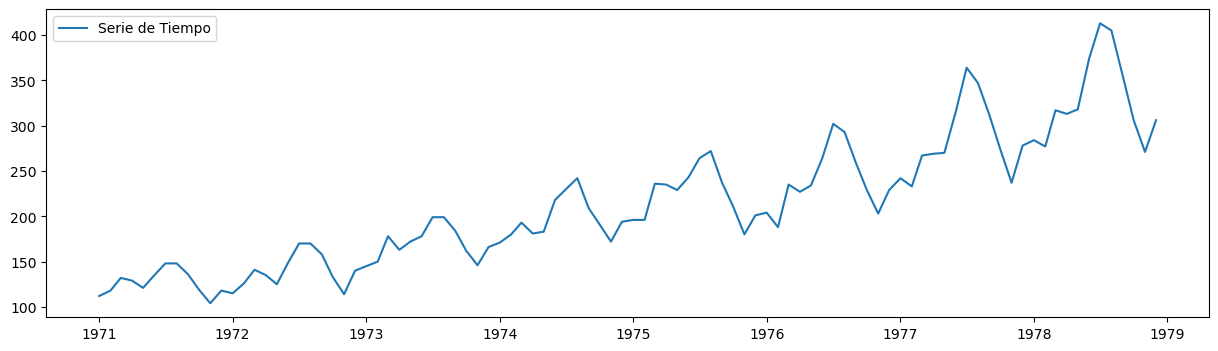

In [90]:
# Graficamos las observaciones
plt.figure(figsize=(15,4))
plt.plot(df_airlines_sales["Dates"], df_airlines_sales["Observations"], label="Serie de Tiempo")
plt.legend(loc="best")
plt.show()

Podemos observar que las observaciones tienden a incrementar, despues a decrementar y vuelven a incrementar, siguiendo un patron, podemos inferir que se basa en las fechas de vacaciones donde incrementa mas el numero de ventas en la areolinea.

c)

In [4]:
# Convertimos la columna 'Dates' a tipo datetime
df_airlines_sales['Dates'] = pd.to_datetime(df_airlines_sales['Dates'])

# Creamos una nueva columna llamada 'Year'
df_airlines_sales['Year'] = df_airlines_sales['Dates'].dt.year

# Calculamos la mediana del número de pasajeros por año
median_passengers_per_year = df_airlines_sales.groupby('Year')['Observations'].median()

In [15]:
# Mostramos la mediana del número de pasajeros internacionales de cada año
median_passengers_per_year

Year
1971    125.0
1972    137.5
1973    169.0
1974    192.0
1975    232.0
1976    231.5
1977    272.0
1978    315.0
Name: Observations, dtype: float64

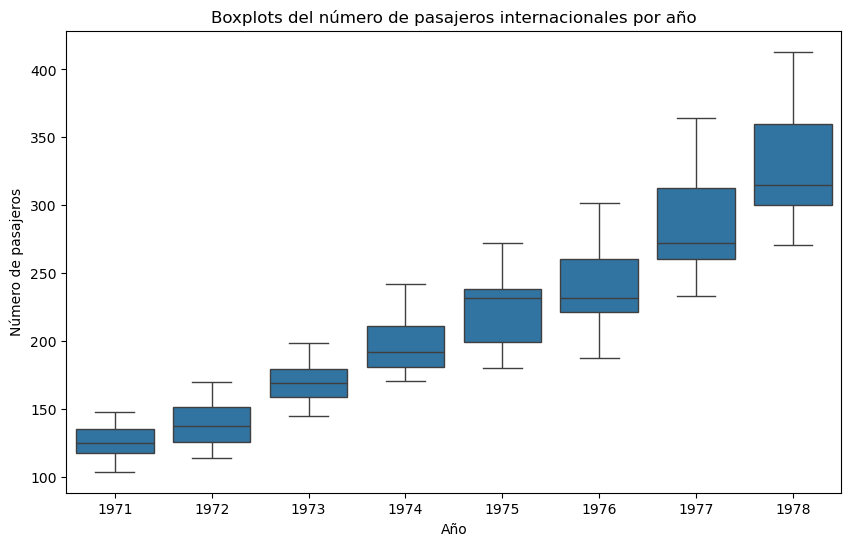

In [18]:
# Graficamos boxplots del número de pasajeros por año
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Observations', data=df_airlines_sales)

plt.title('Boxplots del número de pasajeros internacionales por año')
plt.xlabel('Año')
plt.ylabel('Número de pasajeros')

plt.show()


d)

In [82]:
# Declaracion de la media movil (12 meses)
MA = 12

# Calculamos la tendencia usando un promedio móvil
ma = df_airlines_sales["Observations"].rolling(window=MA).mean()

# Calculamos la varianza
std_ma = df_airlines_sales["Observations"].rolling(MA).std()

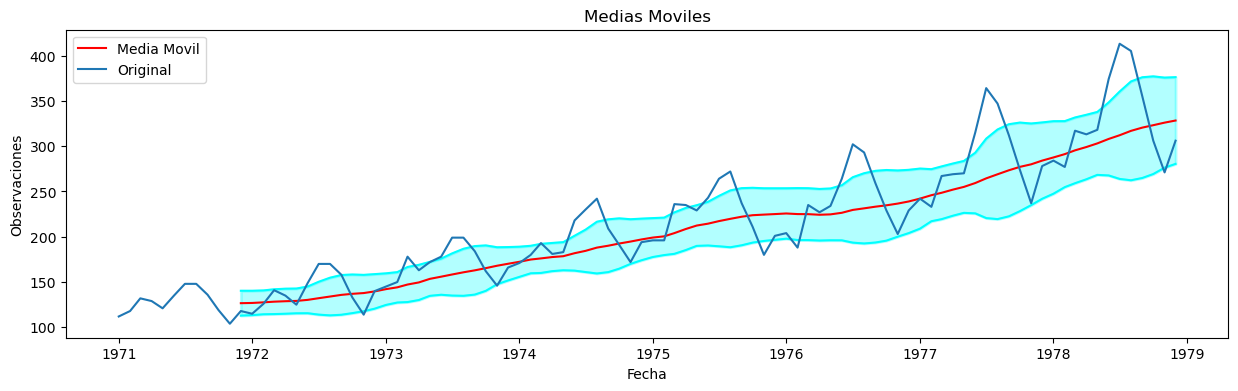

In [81]:
plt.figure(figsize=(15,4))

plt.plot(df_airlines_sales["Dates"], ma+std_ma, color="cyan")
plt.plot(df_airlines_sales["Dates"], ma-std_ma, color="cyan")
plt.fill_between(df_airlines_sales["Dates"], y1=ma+std_ma, y2=ma-std_ma, alpha=0.3, linewidth=2, color='cyan')
plt.plot(df_airlines_sales["Dates"], ma, color="red", label="Media Movil")
plt.plot(df_airlines_sales["Dates"], df_airlines_sales["Observations"], label="Original")
plt.gca().set(title="Medias Moviles", xlabel="Fecha", ylabel="Observaciones")
plt.legend(loc="best")
plt.show()

## Inciso 4

In [2]:
path_electricity = 'Electricity.xls'  # Directorio en el que se encuentra el documento
df_electricity = pd.read_excel(path_electricity)

path_clay_bricks = 'ClayBricks.xls'  # Directorio en el que se encuentra el documento
df_clay_bricks = pd.read_excel(path_clay_bricks)

### Método 1:
Estimación por minimos cuadrados de $m_t$

In [17]:
def metodo1(df, index_v, dates_v, label_title):
    t = np.arange(len(df))
    # Generamos una matriz de diseño con términos [1, t, t^2]
    X = np.column_stack((np.ones(len(t)), t, t**2))

    # Estimamos los coeficientes con mínimos cuadrados
    coeffs = np.linalg.lstsq(X, df[index_v].values, rcond=None)[0]

    # La tendencia ajustada (m_t) es una combinación de los coeficientes estimados
    m_t = coeffs[0] + coeffs[1] * t + coeffs[2] * t**2

    # Graficar la serie original y la tendencia ajustada
    plt.figure(figsize=(15,4))
    plt.plot(df[dates_v], df[index_v].values, label="Serie Original")
    plt.plot(df[dates_v], m_t, color="red", label="Tendencia Cuadrática")
    plt.legend(loc="best")
    plt.title(f"{label_title}")
    plt.show()

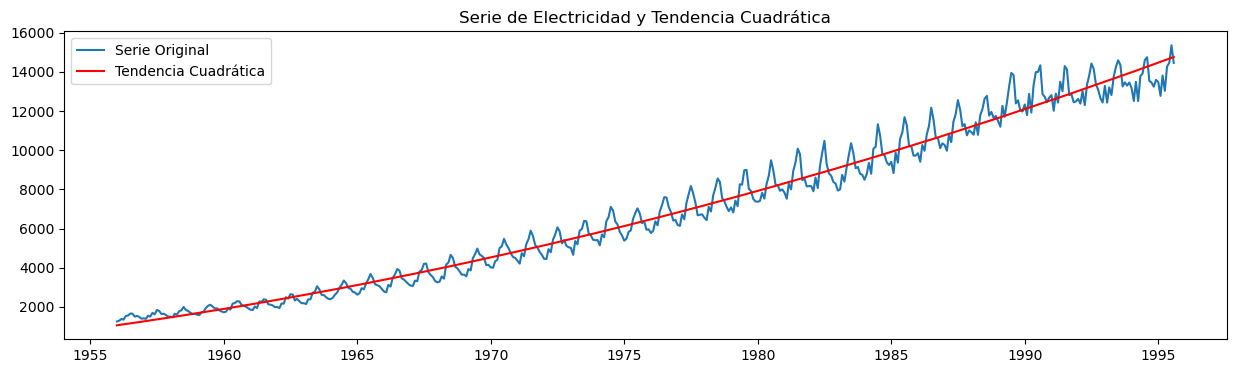

In [18]:
metodo1(df_electricity, index_v = "Kwh", dates_v = "Month and year", label_title = "Serie de Electricidad y Tendencia Cuadrática")

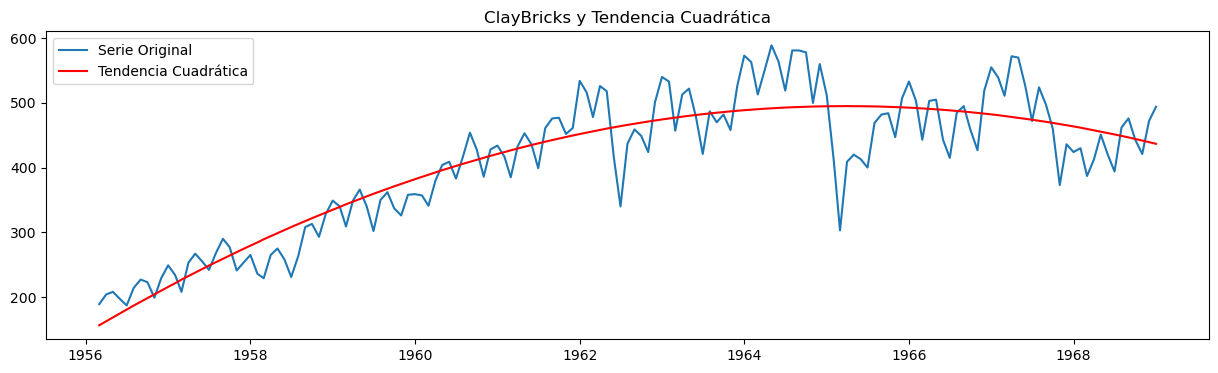

In [19]:
metodo1(df_clay_bricks, index_v = "Bricks", dates_v = "Dates", label_title = "ClayBricks y Tendencia Cuadrática")

### Método 2:
Suavizado mediante una media móvil

In [20]:
def metodo2(df, q, a, index_v, dates_v, label_title):
    n = len(df[index_v])

    m_t = np.zeros(n)

    for t in range(q+1, n-q):
        m_t[t] = sum( df[index_v][t-q:t+q] )/(2*q + 1)

    m_t[:q] = m_t[q]
    m_t[n-q:] = m_t[n-q-1]

    # Graficar la serie original y la tendencia suavizada
    plt.figure(figsize=(15,4))
    plt.plot(df[dates_v], df[index_v].values, label="Serie Original")
    plt.plot(df[dates_v], m_t, label="Serie Suavizada (Media Móvil)", color='red')
    plt.legend(loc="best")
    plt.title(label_title)
    plt.show()

    mt_exp = np.zeros(n)
    mt_exp[0] = m_t[0]

    for t in range(1,n):
        mt_exp[t] = a * df[index_v][t] + (1-a) * m_t[t-1]
    
    # Graficar la serie original y la suavizada
    plt.figure(figsize=(15,4))
    plt.plot(df[dates_v],df[index_v], label="Serie Original")
    plt.plot(df[dates_v], mt_exp, label="Serie Suavizada (Exponencial)", color='red')
    plt.legend(loc="best")
    plt.title("Serie Suavizado Exponencial")
    plt.show()


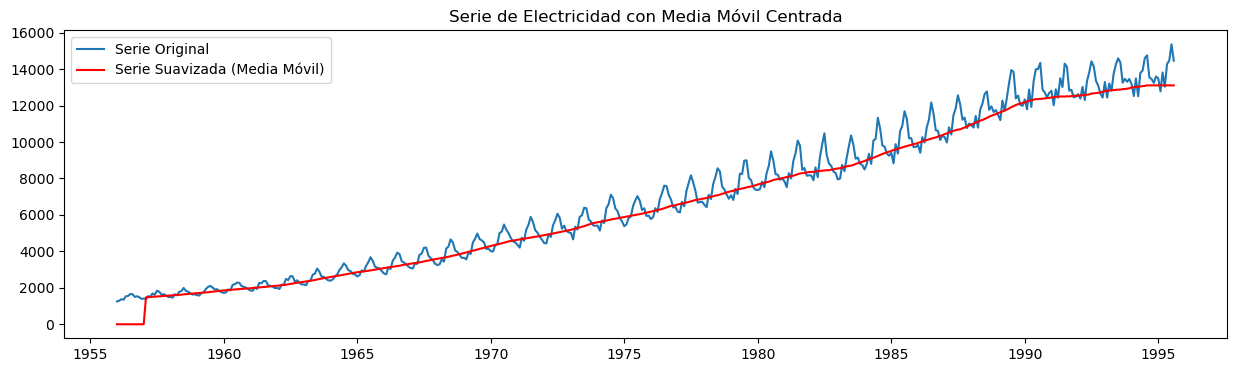

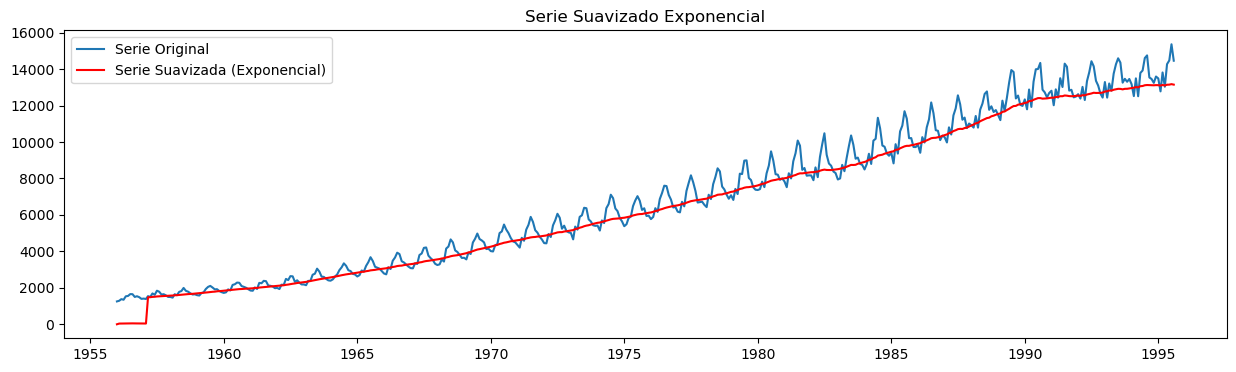

In [24]:
metodo2(df_electricity, q = 12, a = 0.03, index_v = "Kwh", dates_v = "Month and year", label_title = "Serie de Electricidad con Media Móvil Centrada")

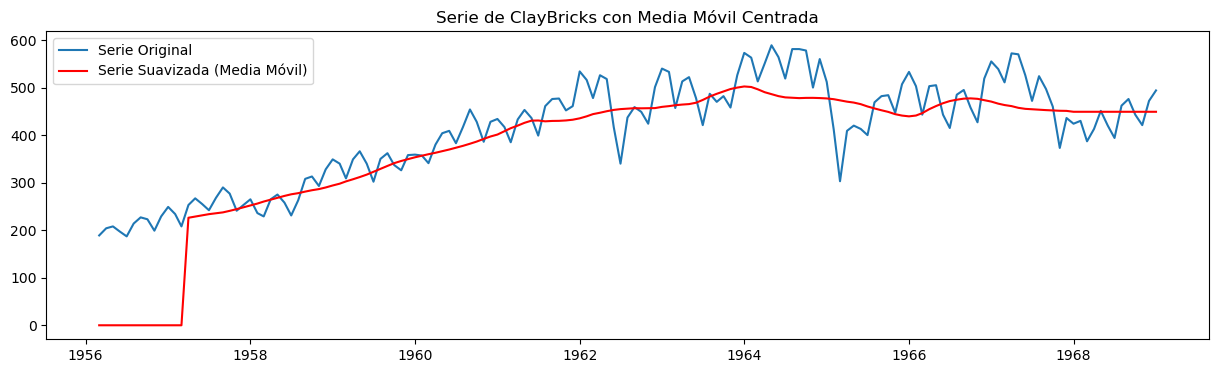

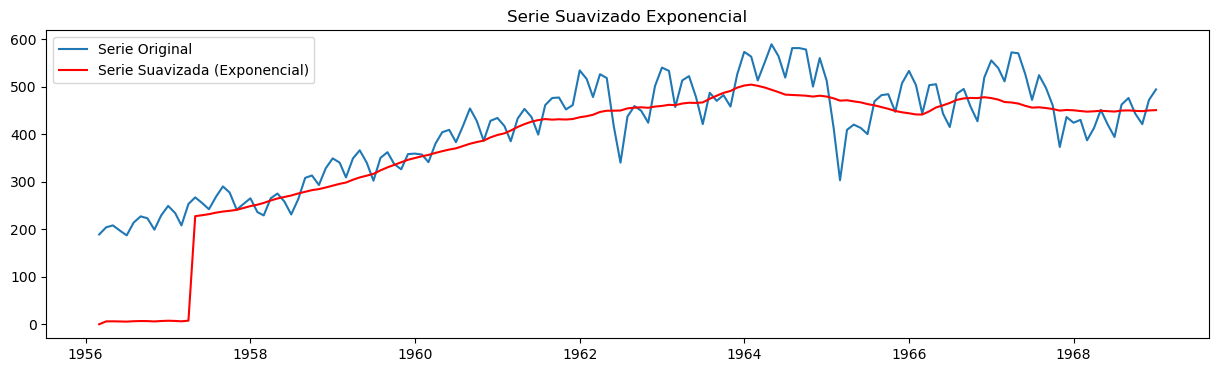

In [23]:
metodo2(df_clay_bricks, q = 12, a = 0.03, index_v = "Bricks", dates_v = "Dates", label_title = "Serie de ClayBricks con Media Móvil Centrada")

## Método 3
Diferenciación para Generar Datos Estacionarios

In [28]:
def metodo3(df, index_v, dates_v, label_title):
    n = df[index_v].size

    diff_X = np.zeros(n-2)
    for t in range(2, n):
        diff_X[t-2] = df[index_v][t] - 2*df[index_v][t-1] + df[index_v][t-2]

    # Gráfico de la segunda diferencia
    plt.figure(figsize=(15,4))
    plt.plot(df[dates_v][2:], diff_X, label=label_title, color='red')
    plt.legend(loc="best")
    plt.title(label_title)
    plt.show()


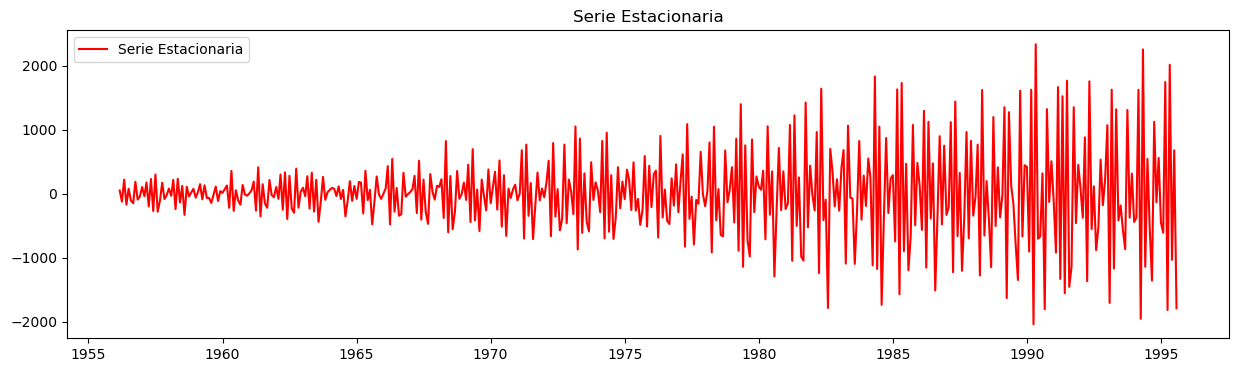

In [29]:
metodo3(df_electricity, index_v = "Kwh", dates_v = "Month and year", label_title = "Serie Estacionaria")

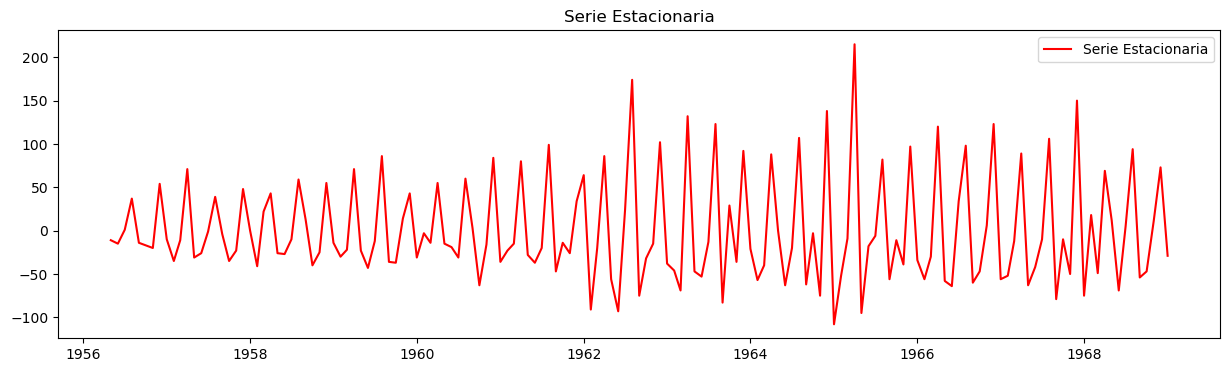

In [30]:
metodo3(df_clay_bricks, index_v = "Bricks", dates_v = "Dates", label_title = "Serie Estacionaria")

## Método S1 
Método de Tendencia Pequeña

In [62]:
def s1(df, index_v, dates_v):
    # Verificamos que la columna de fechas esté en formato de fecha
    df[dates_v] = pd.to_datetime(df[dates_v])
    
    # Crear columnas 'month' y 'year'
    df['month'] = df[dates_v].dt.month
    df['year'] = df[dates_v].dt.year

    # Calculamos la tendencia anual promediando los datos por año
    df['Trend'] = df.groupby('year')[index_v].transform('mean')

    # Estimar la estacionalidad
    # Primero restamos la tendencia de cada observación
    df['Detrended'] = df[index_v] - df['Trend']

    # Agrupamos por mes para estimar el componente estacional
    seasonal_factors = df.groupby('month')['Detrended'].mean()

    # Restar el componente estacional
    df['Seasonal'] = df['month'].map(seasonal_factors)

    # Calcular los residuos
    df['Residual'] = df[index_v] - df['Trend'] - df['Seasonal']


    # Graficar los residuos
    plt.figure(figsize=(15,4))
    sns.lineplot(x=df[dates_v], y=df['Residual'], label='Residuos', color='red')
    plt.title('Residuos')
    plt.ylabel('Residuos')
    plt.xlabel('Mes y Año')
    plt.legend()

    plt.show()

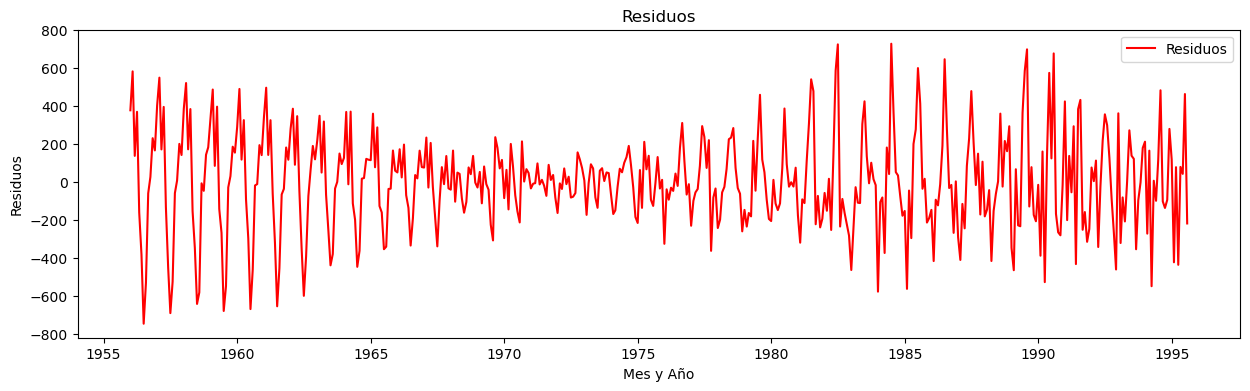

In [63]:
s1(df_electricity, index_v = "Kwh", dates_v = "Month and year")

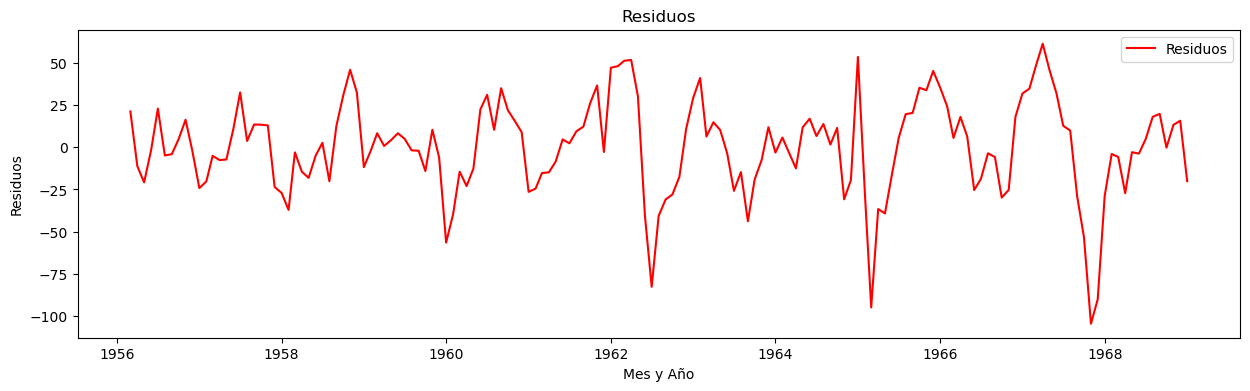

In [64]:
s1(df_clay_bricks, index_v = "Bricks", dates_v = "Dates")

## Método S2 
Método de Estimación de media móvil

In [3]:
# Estimación de la tendencia utilizando media móvil
def moving_average_trend(x, d, q, n):
    trend = []
    for t in range(q, n - q):
        mt = ( 0.5*x[t-q] + sum( x[t - q + 1:t + q - 1] ) + 0.5*x[t+q] )/d
        trend.append(mt)
    return trend

In [4]:
def average_deviations(d, j, x, m, n, q):
    wk = []
    for k in range(d):
        index = k + j*d
        if index in range(q, n - q):
            wk.append( x[index] - m[index] )
    return wk

In [5]:
def estimate_seasonal_component(w, d, n):
    media = np.mean(w)
    sk = np.zeros(n)
    for k in range(d):
        sk[k] = w[k] - media
    for k in range(d, n):
        sk[k] = sk[k-d]
    return sk

In [11]:
def s2(df, d, j, index_v):
    n = df[index_v].size
    q = (d - 1) // 2 if d % 2 != 0 else d // 2

    m_t = moving_average_trend(df[index_v], d, q, n)
    w_k = average_deviations(d, j, df[index_v], m_t, n, q)
    s_k = estimate_seasonal_component(w_k, d, n)
    
    d_t = df[index_v] - s_k

    # **Parte 2: Reestimar la tendencia a partir de los datos deseasonalizados**
    # Usamos la misma función de media móvil para reestimar la tendencia, pero ahora sobre d_t
    m_t_reestimado = moving_average_trend(d_t, d, q, n)

    # Graficar los resultados
    plt.figure(figsize=(12, 8))
    plt.plot(df[index_v], label='Datos Originales')
    # plt.plot(m_t, label='Tendencia Estimada')
    plt.plot(m_t_reestimado, label='Tendencia Reestimada')
    plt.legend()
    plt.show()

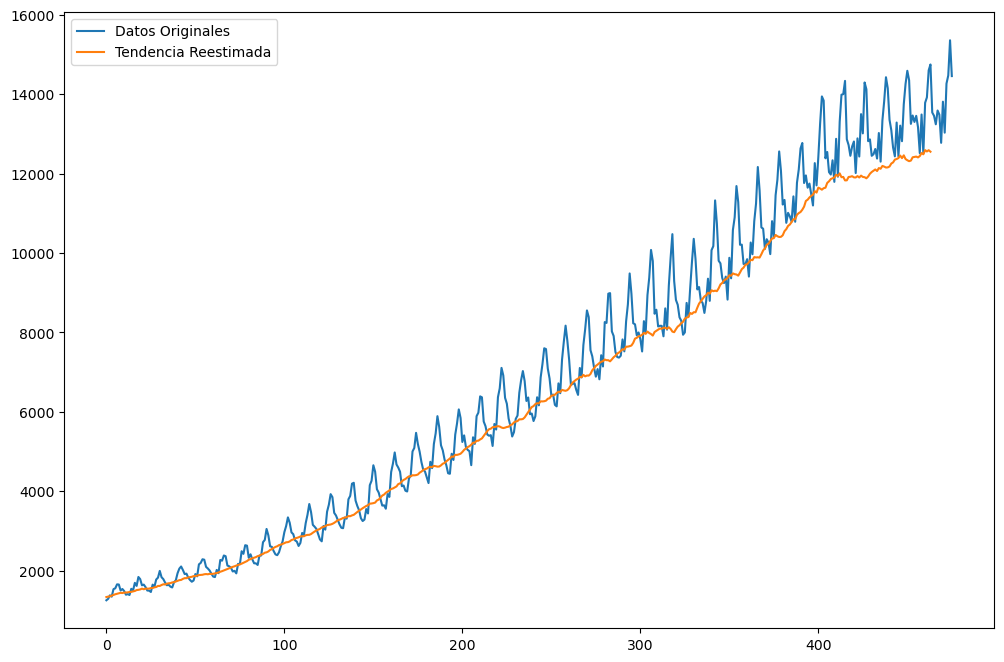

In [12]:
s2(df_electricity, d = 12, j = 6, index_v = "Kwh")

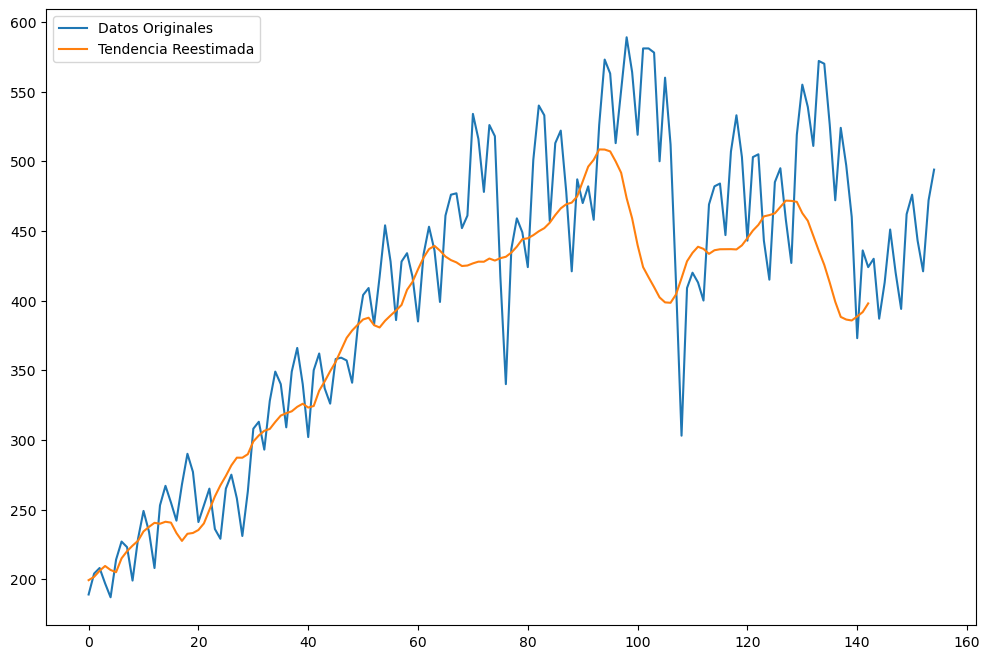

In [13]:
s2(df_clay_bricks, d = 12, j = 6, index_v = "Bricks")

## Método S3
Método de Diferenciación de retrazo d

In [14]:
def s3(df, d, index_v, dates_v, label_title, ylabel):
    # Aplicar la diferenciación estacional
    diff_estacional = df[index_v] - df[index_v].shift(d)

    # Graficar la serie diferenciada estacionalmente
    plt.figure(figsize=(10,6))
    plt.plot(df[dates_v], diff_estacional, label=label_title)
    plt.title(f"Serie temporal diferenciada estacionalmente (Lag d={d})")
    plt.xlabel('Tiempo')
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

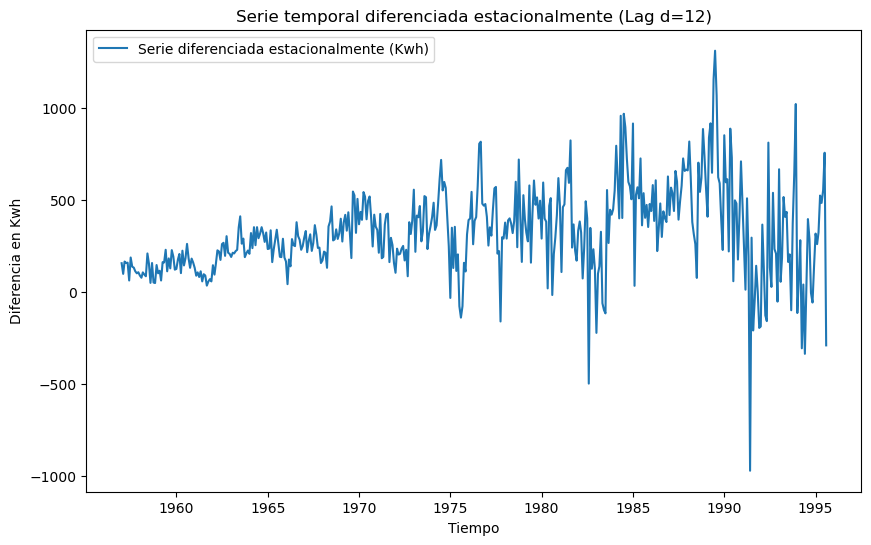

In [15]:
s3(df_electricity, d = 12, index_v = "Kwh", dates_v = "Month and year", label_title = "Serie diferenciada estacionalmente (Kwh)", ylabel = "Diferencia en Kwh")

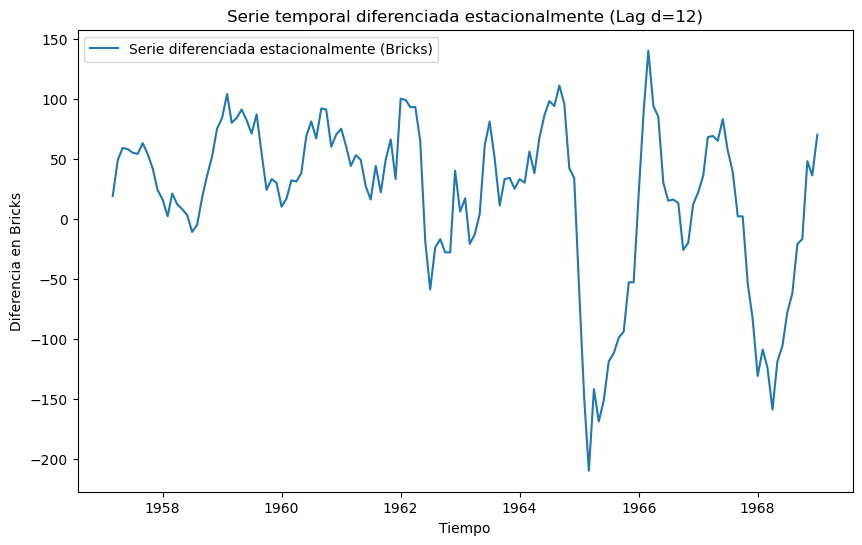

In [16]:
s3(df_clay_bricks, d = 12, index_v = "Bricks", dates_v = "Dates", label_title = "Serie diferenciada estacionalmente (Bricks)", ylabel = "Diferencia en Bricks")